# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data and describe statstics

In [4]:
rawData = pd.read_csv('./vehicles.csv')

In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
rawData.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
rawData.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [8]:
rawData.shape

(426880, 18)

## Investigate Missing or Problematic Data

### Check for zero Values

In [9]:
rawData.eq(0).sum()

,0
id,0
region,0
price,32895
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,1965


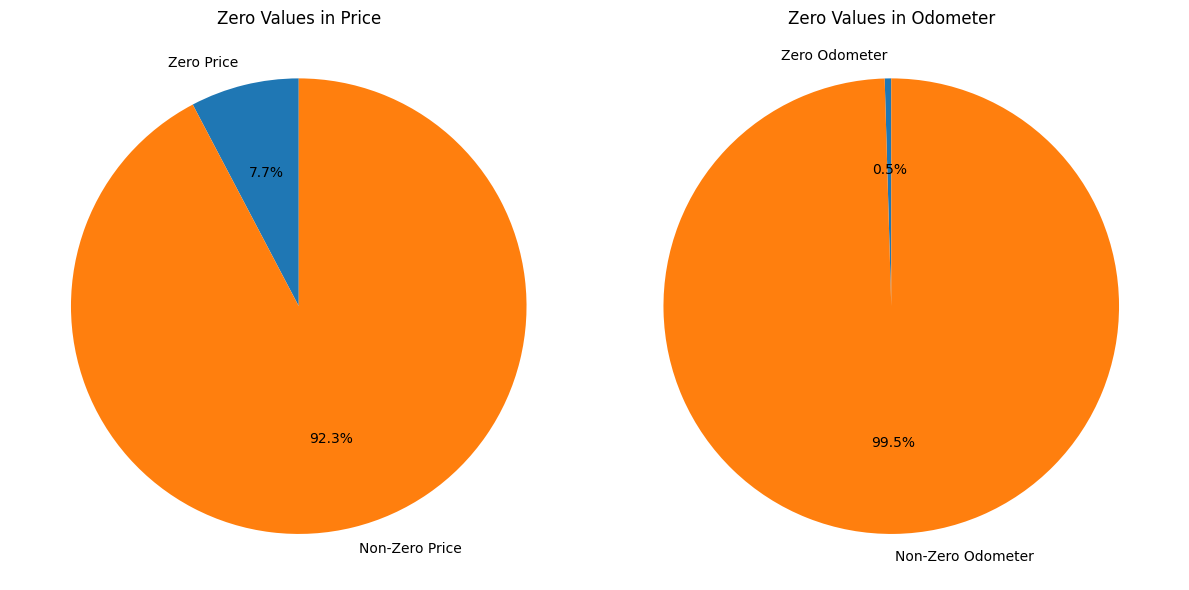

In [10]:

price_zeros = rawData['price'].eq(0).sum()
odometer_zeros = rawData['odometer'].eq(0).sum()

# Total number of records
total_records = len(rawData)

# Calculate percentages
price_zero_percentage = (price_zeros / total_records) * 100
odometer_zero_percentage = (odometer_zeros / total_records) * 100

# Create the pie charts
labels_price = ['Zero Price', 'Non-Zero Price']
sizes_price = [price_zero_percentage, 100 - price_zero_percentage]

labels_odometer = ['Zero Odometer', 'Non-Zero Odometer']
sizes_odometer = [odometer_zero_percentage, 100-odometer_zero_percentage]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure and two subplots

# Price Pie Chart
axes[0].pie(sizes_price, labels=labels_price, autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Zero Values in Price')

# Odometer Pie Chart
axes[1].pie(sizes_odometer, labels=labels_odometer, autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Zero Values in Odometer')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### **Data Observation1**: Price has got around 32895 zero values of 6.6% of total data, Possible that these records dummy/unused and not interested for dealership, will drop $0 price records.

### ****Data Observation2****:odometer has got around 1965 zero values of 0.5 % of total data 426879, though this smallest values of 0 will drop thise record.



## Check for Duplicate records

In [11]:
duplicate_rows = rawData[rawData.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


Number of duplicate rows: 0


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


In [12]:
count = rawData['VIN'].value_counts()

duplicateRec = count[count > 1]
print(duplicateRec)


VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
SHHFK7H43JU227804      2
3N1CN7AP1KL801368      2
3C6UR5FL0GG178879      2
5N1DL0MM6JC505090      2
KNDPMCAC1J7393528      2
Name: count, Length: 40280, dtype: int64


In [13]:
rawData.query("VIN == '1FTER1EH1LLA36301'")
rawData.query("VIN == '1GCHTCE37G1186784'")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
251,7316160104,birmingham,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
1855,7315245325,dothan,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
2166,7315385350,florence / muscle shoals,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
2314,7316244323,gadsden-anniston,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417059,7316774890,green bay,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
419188,7315296319,la crosse,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
419708,7316781953,madison,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi
422238,7316655042,milwaukee,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,wi


### ****Data Observation3**: Noticed that same VIN number is listed multiple times the regions are different , odometer value is same., region columne can be thought of to drop as it is not constant across may be junk.

## Check for Unique Records

In [14]:
rawData.nunique()

,0
id,426880
region,404
price,15655
year,114
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
odometer,104870


### **Data Observation4**: id value matches the total count of records, how ever the **VIN value contains duplicates**  as seen above.


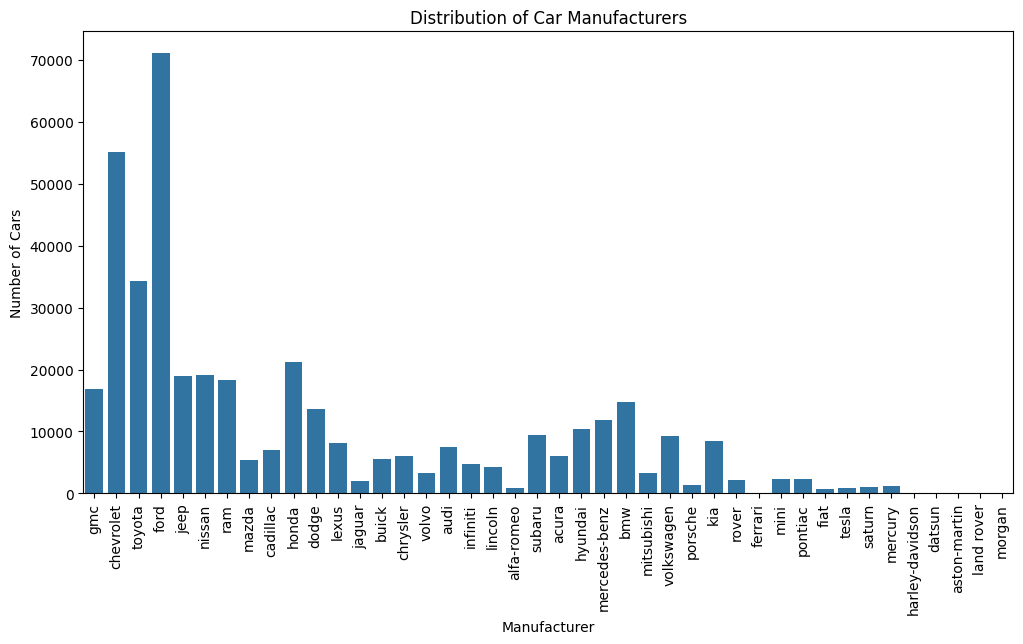

In [20]:
# prompt: plot graph for manufacturer


# Assuming 'manufacturer' is a column in your rawData DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=rawData)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.show()


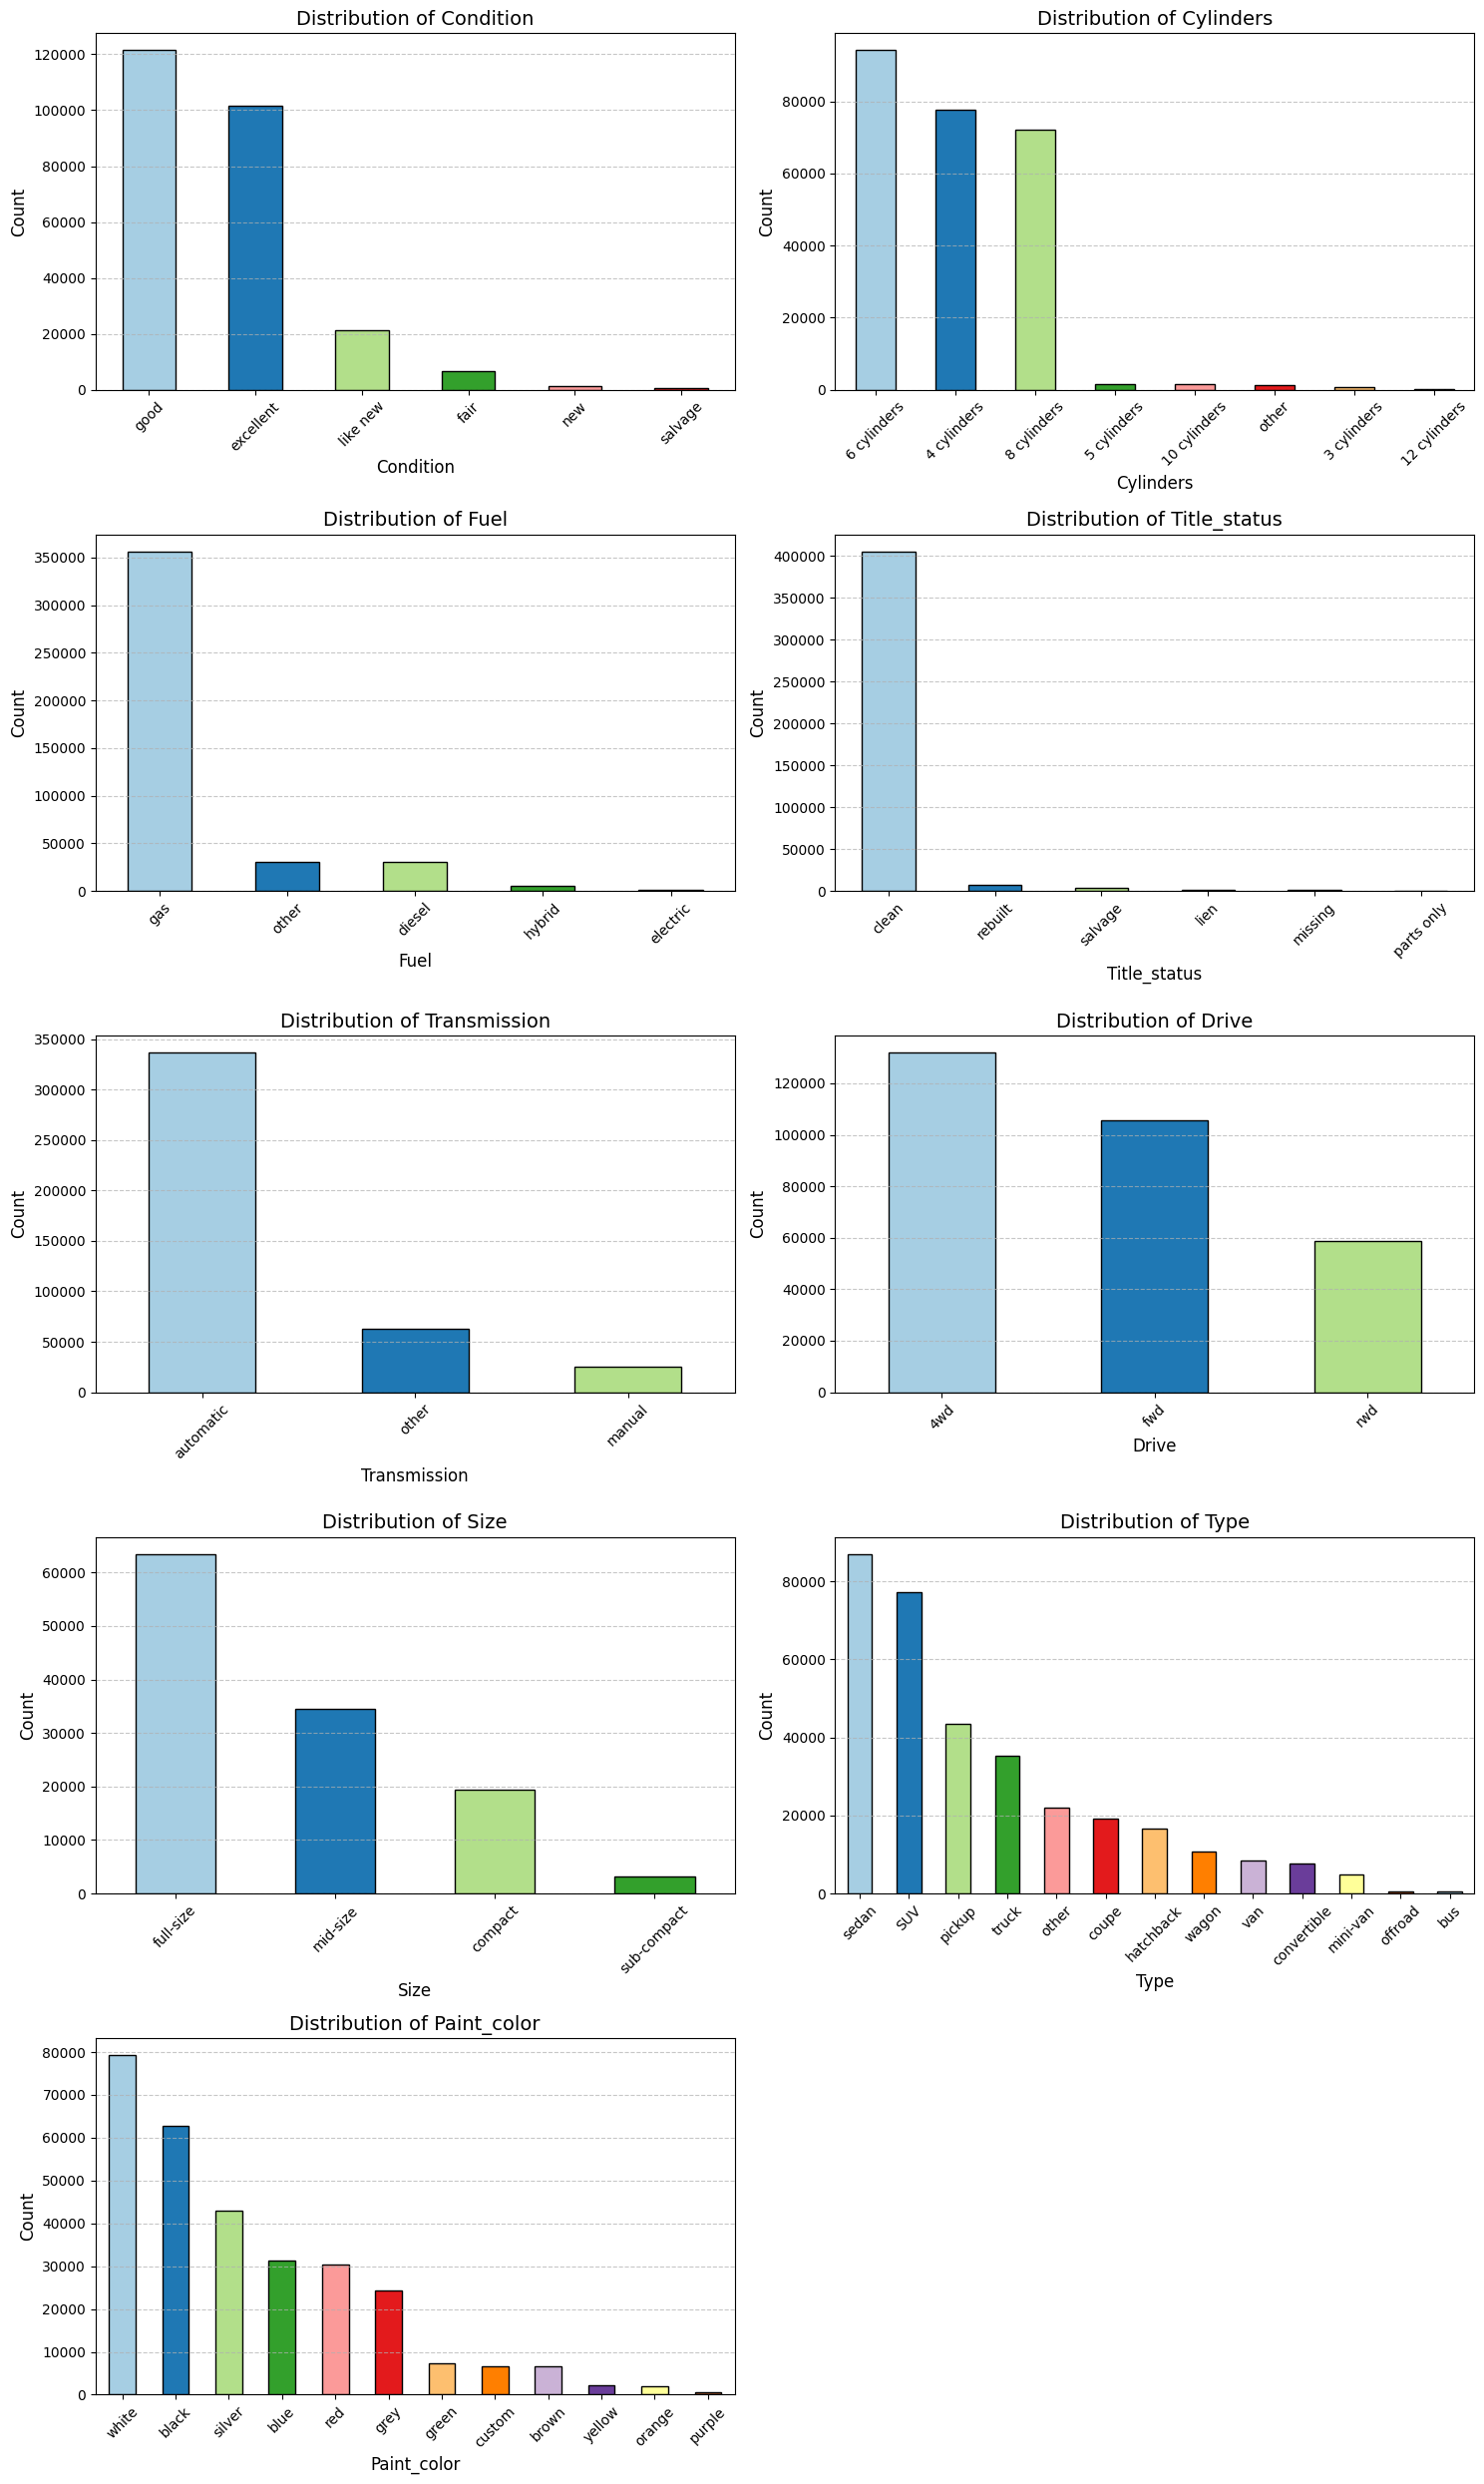

In [37]:
columns_to_plot = ["condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color"]

# Set figure size and layout with 2 graphs per row
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

# Create a bar chart for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    rawData[column].value_counts().plot(kind="bar", color=plt.cm.Paired.colors, edgecolor="black", ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Hide any empty subplots if needed
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Data Observation6**

**Condition Distribution**

- The majority of the vehicles in the dataset are categorized under a few specific conditions, with many missing or unknown values.
- "Like new" and "Excellent" conditions appear to be more frequent, while "Salvage" and "Fair" conditions are less common.

**Cylinders Distribution**

- 4-cylinder and 6-cylinder vehicles dominate the dataset, indicating a preference for fuel-efficient and mid-range performance vehicles.
- 8-cylinder engines, often found in trucks and sports cars, are also present but in smaller numbers.

**Fuel Type Distribution**

- Gasoline is the most common fuel type, suggesting that traditional fuel-powered vehicles still dominate the market.
- Diesel and hybrid vehicles have relatively lower counts, while electric vehicles make up a small fraction of the dataset.

**Title Status**

- The majority of the vehicles have a "Clean" title, meaning they have not been significantly damaged.
- "Salvage" and "Rebuilt" titles are less frequent, indicating that heavily damaged or repaired vehicles are not as common in listings.

**Transmission Type**

- Automatic transmission is the most prevalent, showing a strong consumer preference for convenience over manual shifting.
- Manual transmission vehicles are significantly less common, often associated with sports cars or older models.

**Drive Type**

- Front-wheel drive (FWD) and four-wheel drive (4WD/AWD) vehicles appear to be the most common.
- Rear-wheel drive (RWD) vehicles are less frequent, likely due to their association with sports cars and specific performance vehicles.

**Size Distribution**

- The dataset has a significant number of "Full-size" and "Mid-size" vehicles.
- Compact cars and subcompacts have a lower frequency, possibly due to demand differences in different regions.

**Vehicle Type**

- Trucks, SUVs, and sedans dominate the listings, which aligns with market trends favoring utility and comfort.
- Other types like convertibles and coupes have lower counts, likely reflecting niche market demand.

**Paint Color Distribution**

- The most common colors include black, white, silver, and gray, which are often considered standard and preferred for resale value.
- Uncommon colors like yellow, orange, and purple appear much less frequently, indicating a smaller market for such vehicles.

**Note**
The dataset reveals strong consumer preferences for gasoline-powered, automatic transmission vehicles with clean titles.
The most frequent vehicle categories are trucks, SUVs, and sedans, aligning with real-world sales trends.
Fuel efficiency (4-cylinder engines), neutral paint colors, and mid-size to full-size cars dominate the listings, indicating market demand for practicality and affordability.
There is a relatively low presence of electric, hybrid, and alternative-fuel vehicles, which might indicate slower adoption rates compared to gasoline-powered cars.

In [39]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## Check for Outliers

In [64]:
rawData.describe()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Findings 5**: From describe which fetchs only int & float numerical statstics , ID columns might be not intereseted or relevant to car dealership client, which can be drop off


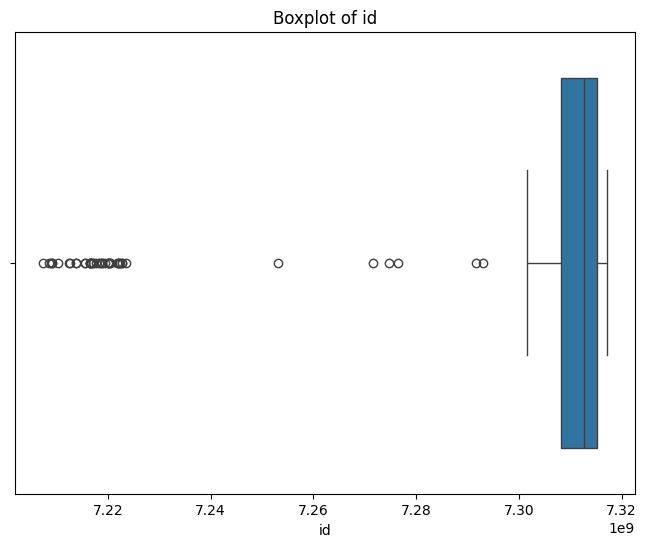

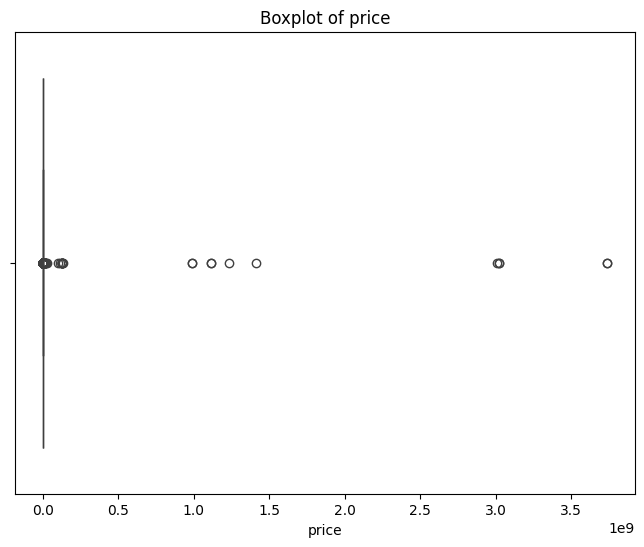

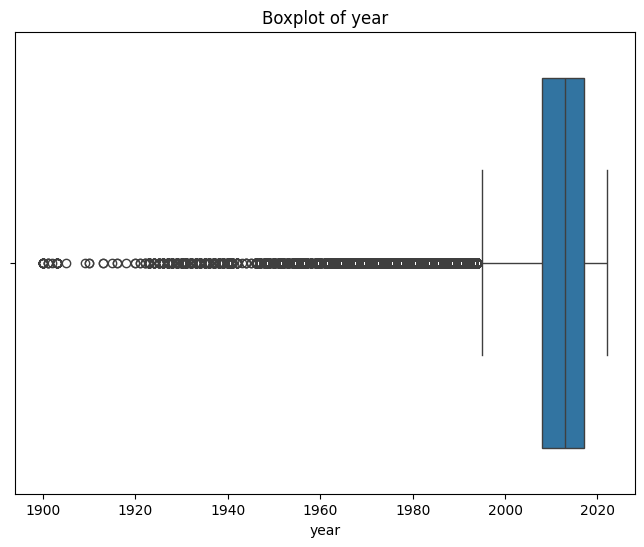

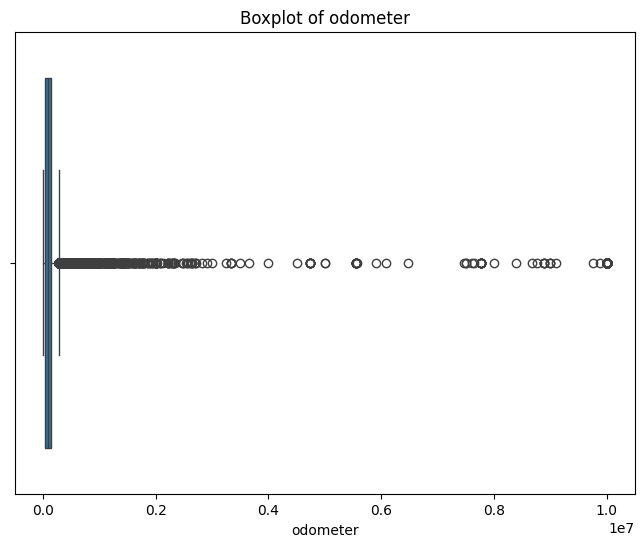

In [63]:
# prompt: check for outliers from rawdata

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'rawData' DataFrame is already loaded as in the provided code

# Check for outliers using boxplots for numerical columns
numerical_cols = rawData.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=rawData[col])
    plt.title(f'Boxplot of {col}')


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Drop Column = id

In [46]:
rawData.drop(columns=['id'], inplace=True)

In [49]:
rawData.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.